# 1. **Introduction¶**
Cristiano Ronaldo dos Santos Aveiro is a Portuguese professional footballer who plays as a forward for Premier League club Manchester United and captains the Portugal national team.

Current team: Portugal national football team (#7 / Forward) Trending

Born: February 5, 1985 (age 39 years), Hospital Dr. Nélio Mendonça, Funchal, Portugal

Height: 1.87 m
Partner: Georgina Rodríguez (2017–)
Salary: 26.52 million GBP (2022)
Children: Cristiano Ronaldo Jr., Alana Martina dos Santos Aveiro, Eva Maria Dos Santos, Mateo Ronaldo

# 2. Data Loading

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px


In [3]:
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)


In [4]:
df=pd.read_csv("/content/drive/MyDrive/data (1).csv")

# Basic Exploration

In [5]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


In [6]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])


,Unique Values Count
Season,21
Competition,17
Matchday,52
Date,468
Venue,2
Club,5
Opponent,129
Result,57
Playing_Position,6
Minute,106


In [7]:
df.describe(include=['object']).T

,count,unique,top,freq
Season,710,21,14/15,61
Competition,710,17,LaLiga,311
Matchday,710,52,Group Stage,75
Date,710,468,09-12-15,5
Venue,710,2,H,404
Club,710,5,Real Madrid,450
Opponent,710,129,Sevilla FC,27
Result,710,57,3:00,49
Playing_Position,652,5,LW,356
Minute,710,106,90,17


##  EDA, Data Visualization

# Goals per competition

In [8]:
px.histogram(
    df,
    x='Competition',
    title="Goals per competition",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800,
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Club'])

In [9]:
pd.DataFrame(df.Competition.value_counts())

,count
Competition,
LaLiga,311
UEFA Champions League,140
Premier League,103
Serie A,81
Copa del Rey,22
FA Cup,13
Saudi Pro League,9
FIFA Club World Cup,7
EFL Cup,4


# Goals per season¶

In [10]:
px.histogram(
    df,
    x='Season',
    title="Goals per season",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800,
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Season','Club'])


In [11]:
pd.DataFrame(df.Competition.value_counts())

,count
Competition,
LaLiga,311
UEFA Champions League,140
Premier League,103
Serie A,81
Copa del Rey,22
FA Cup,13
Saudi Pro League,9
FIFA Club World Cup,7
EFL Cup,4


# Goals per season

In [12]:
px.histogram(
    df,
    x='Season',
    title="Goals per season",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800,
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Season','Club'])


In [13]:
pd.DataFrame(df.Season.value_counts())

,count
Season,
14/15,61
11/12,60
Dec-13,55
10/11,53
13/14,51
15/16,51
17/18,44
07/08,42
16/17,42


# Goals per Clubs

In [14]:
px.histogram(
    df,
    x='Club',
    title="Goals per Clubs - Seasons",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800,
    height=500,
    color='Season',
    hover_name='Season',
    hover_data=['Competition','Season','Club'])

In [15]:
pd.DataFrame(df.Club.value_counts())

,count
Club,
Real Madrid,450
Manchester United,145
Juventus FC,101
Al-Nassr FC,9
Sporting CP,5


# Goals per playing Position

In [16]:
px.histogram(
    df,
    x='Playing_Position',
    title="Goals per playing Position",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800,
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])

In [17]:
pd.DataFrame(df.Playing_Position.value_counts())

,count
Playing_Position,
LW,356
CF,209
RW,79
LW,5
CF,3


# Goals per Game Minute

In [18]:
mins=list(map(str, range(1,121)))
mins.insert(45,"1stE")
mins.insert(91,"2ndE")
mins.insert(122,"ExtE")
df.loc[df.Minute.str[:3]=='45+', 'Minute'] = '1stE'
df.loc[df.Minute.str[:3]=='90+', 'Minute'] = '2ndE'
df.loc[df.Minute.str[:4]=='120+', 'Minute'] = 'ExtE'
mins1=mins[:23]
mins2=mins[23:46]
mins3=mins[46:69]
mins4=mins[69:92]
mins5=mins[92:]

Text(0.5, 1.0, 'Goals per Game Minute (1-23)')

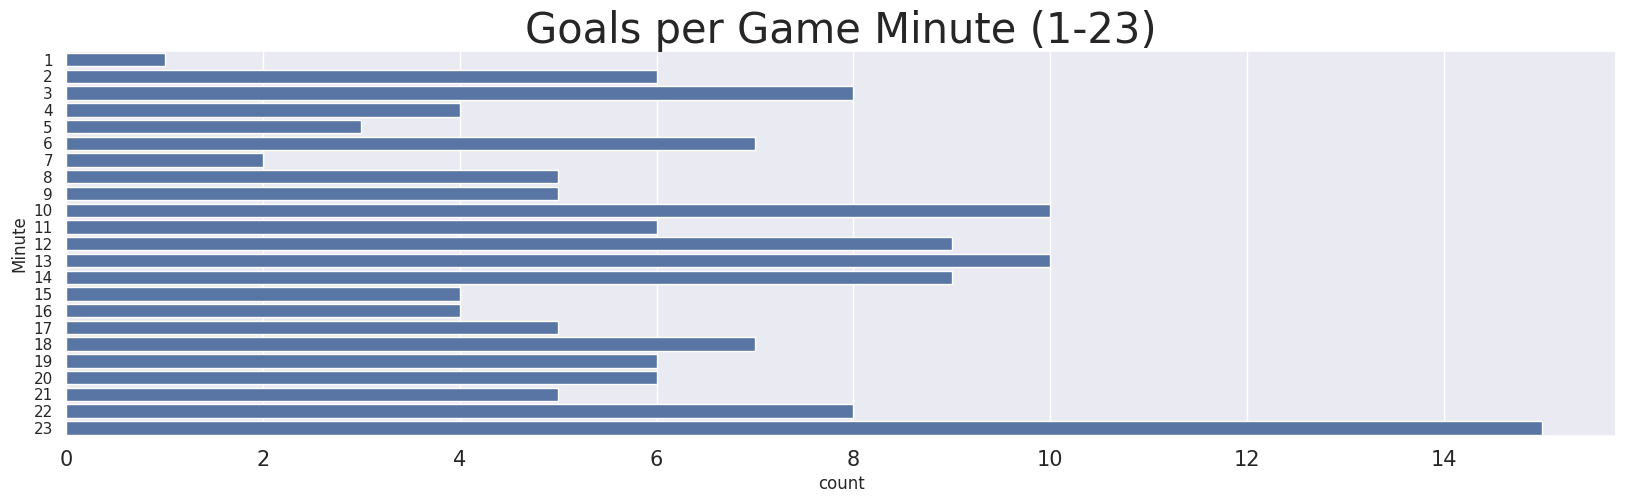

In [19]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15)
p=sns.countplot(df['Minute'],order=mins1)
p.axes.set_title("Goals per Game Minute (1-23)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (24-First Half Extra time)')

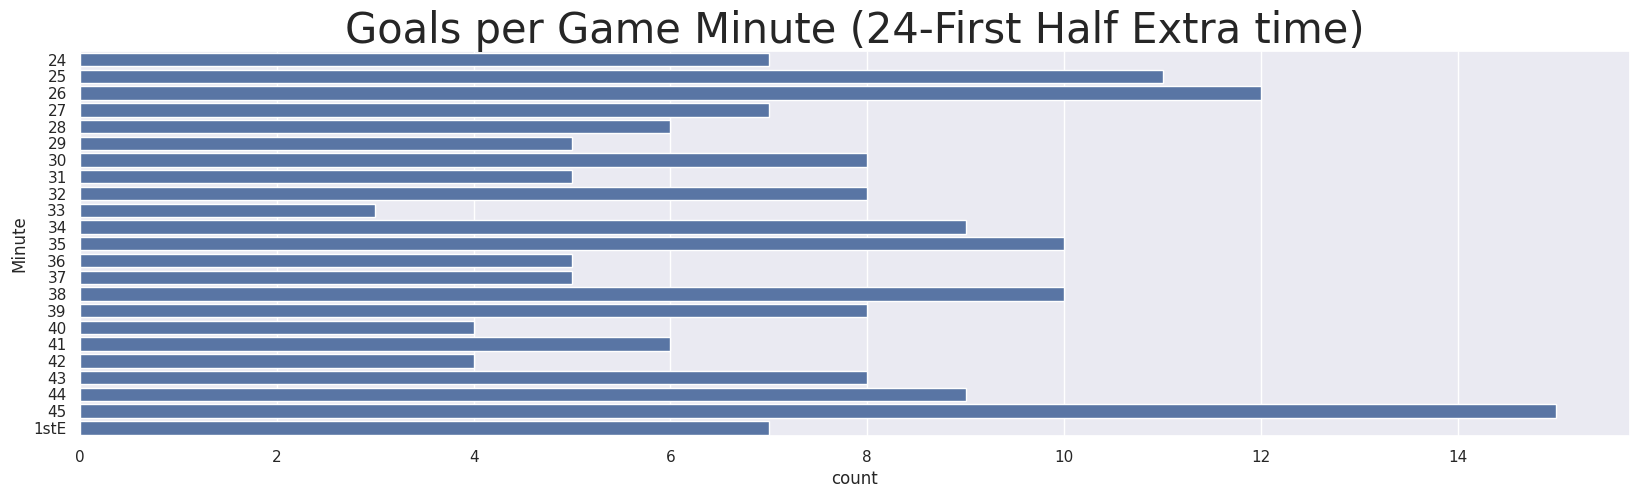

In [20]:
p=sns.countplot(df['Minute'],order=mins2)
p.axes.set_title("Goals per Game Minute (24-First Half Extra time)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (46-68)')

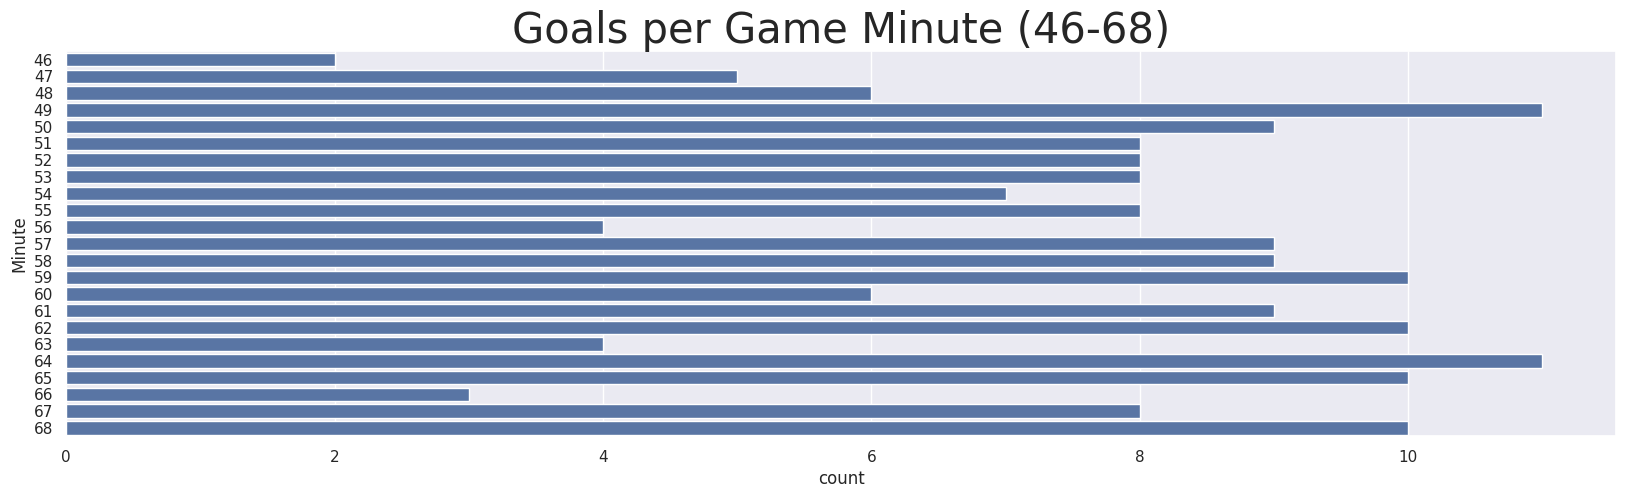

In [21]:
p=sns.countplot(df['Minute'],order=mins3)
p.axes.set_title("Goals per Game Minute (46-68)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute 69- 2nd Half Extra time)')

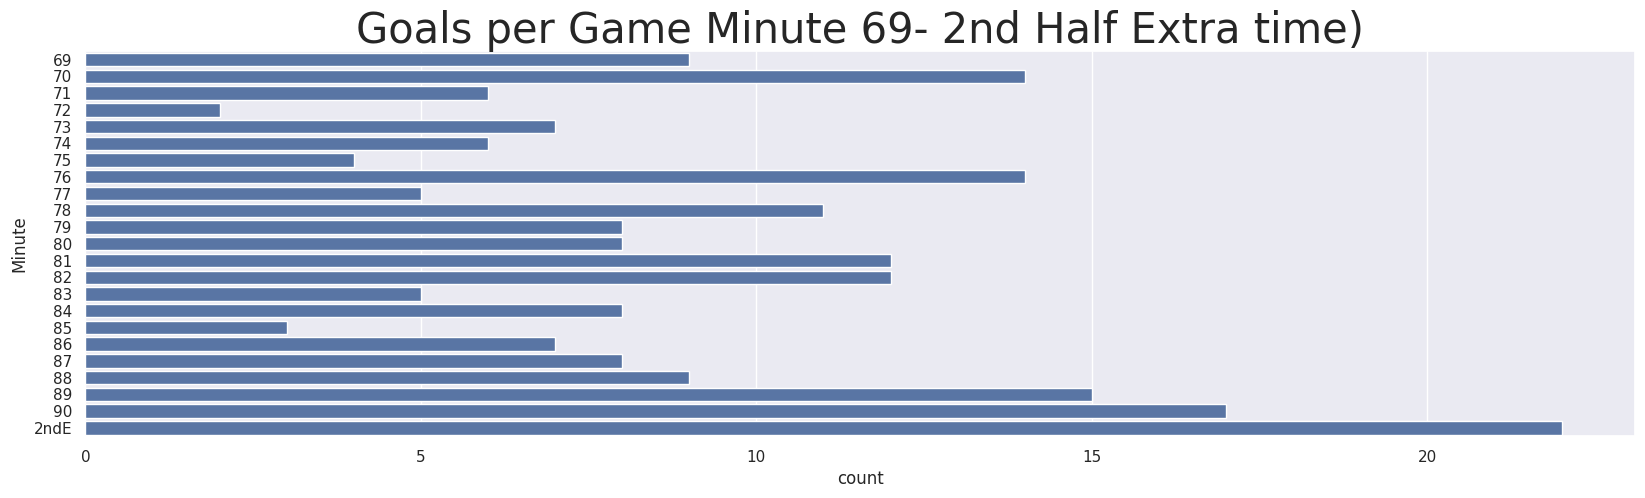

In [22]:
p=sns.countplot(df['Minute'],order=mins4)
p.axes.set_title("Goals per Game Minute 69- 2nd Half Extra time)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (91-Extra times)')

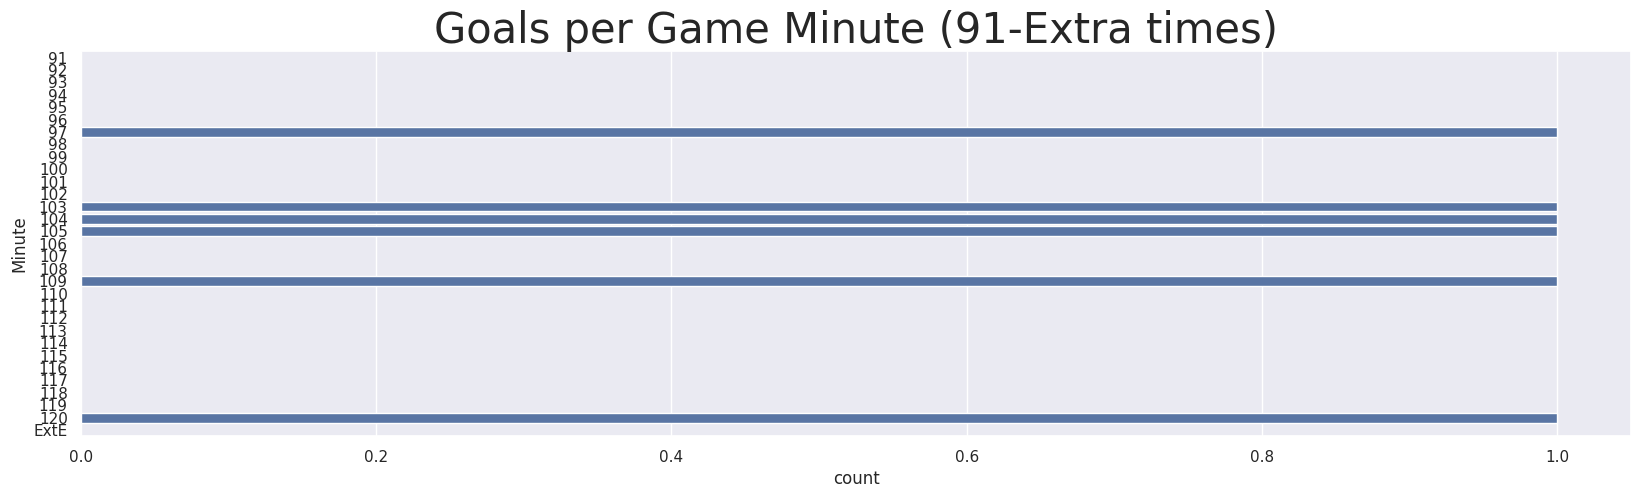

In [23]:
p=sns.countplot(df['Minute'],order=mins5)
p.axes.set_title("Goals per Game Minute (91-Extra times)",fontsize=30)

# Goals per Type_of_goal

In [24]:
px.histogram(
    df,
    x='Type',
    title="Goals per Type",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800,
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])


In [25]:
pd.DataFrame(df.Type.value_counts())

,count
Type,
Right-footed shot,253
Penalty,132
Left-footed shot,113
Header,112
Direct free kick,49
Tap-in,14
Long distance kick,9
Counter attack goal,6
Penalty rebound,3


# Scoreline after goal

Text(0.5, 1.0, 'Scoresheet after scoring')

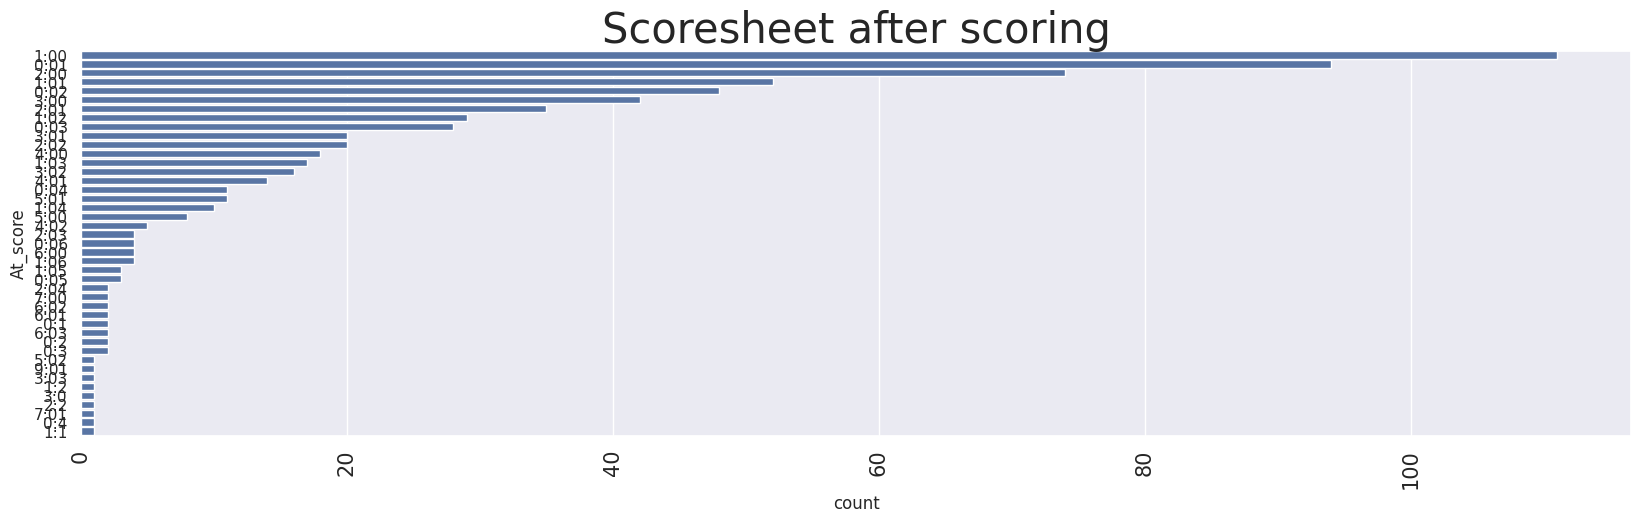

In [26]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['At_score'],hue_order=df.groupby('Competition'),order=df.At_score.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Scoresheet after scoring",fontsize=30)

# Opponents

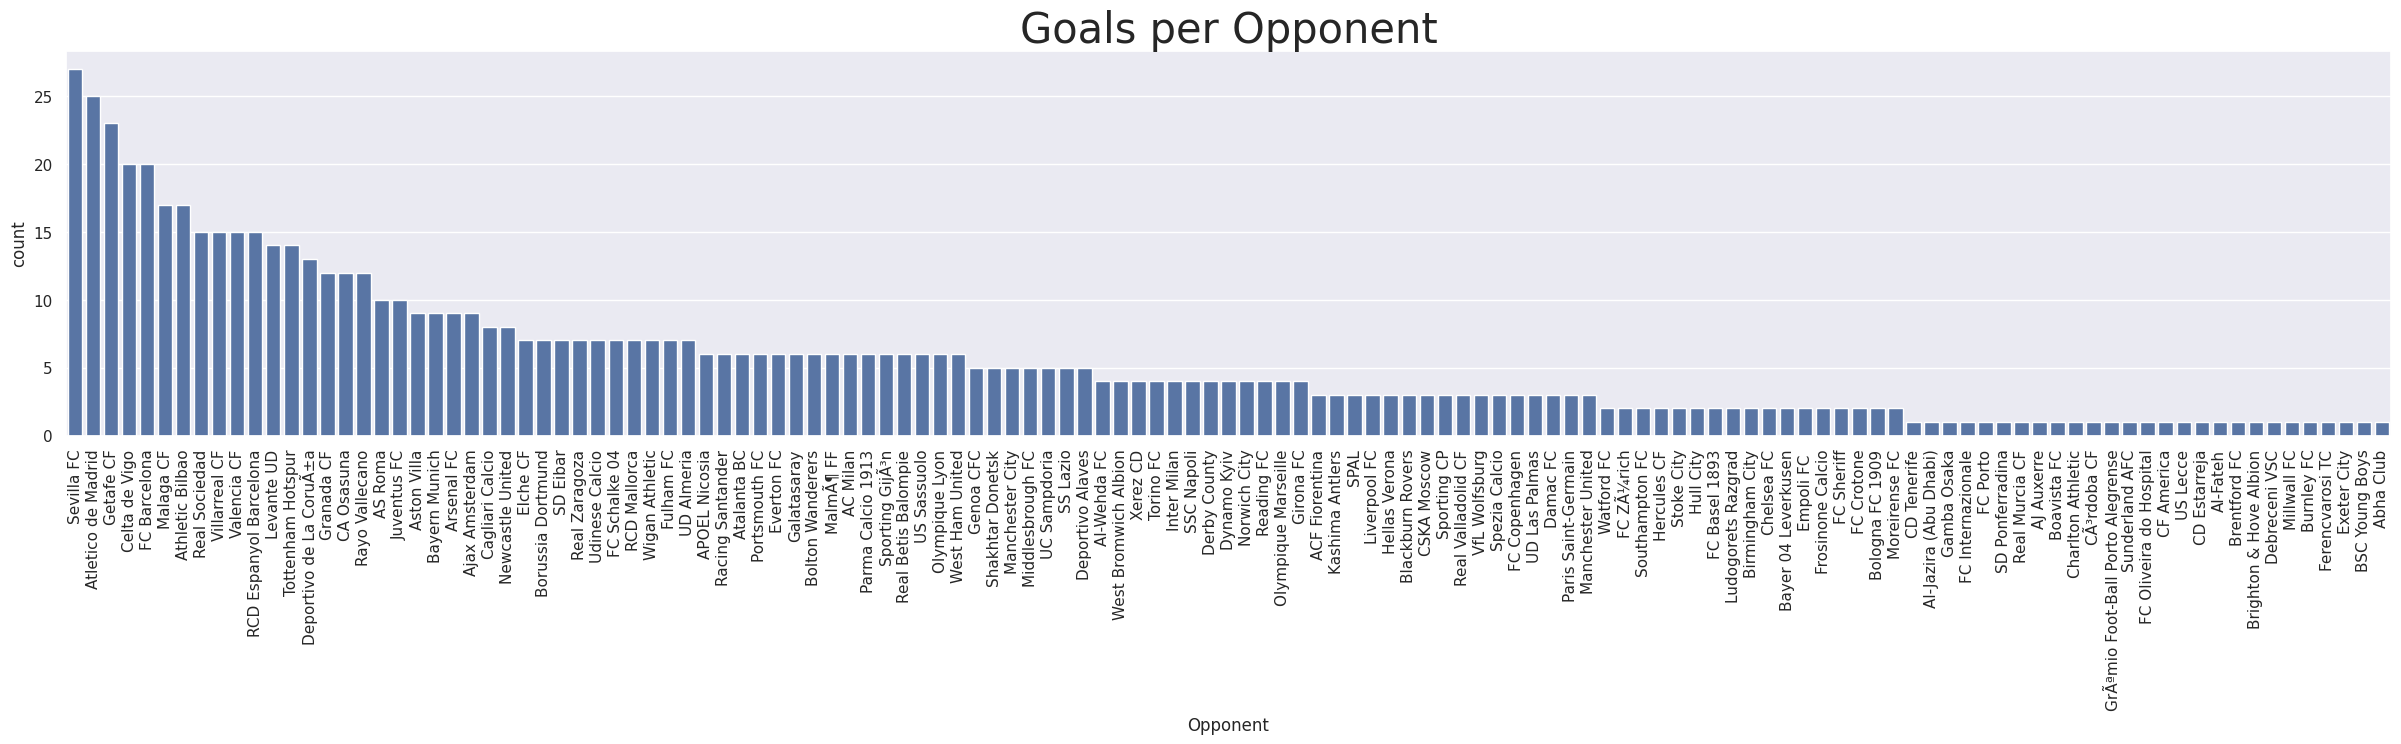

In [27]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(rotation='vertical')
p = sns.countplot( #Removed the newline and added the ( to fix the error
    x='Opponent',
    data=df,
    order=df['Opponent'].value_counts().sort_values(ascending=False).index
) # Added the closing ) since it was missing
p.set_title("Goals per Opponent", fontsize=30)
plt.show()

In [28]:
mins=list(map(str, df.Opponent.value_counts().sort_values(ascending=False).index))
for min in df['Opponent']:
    if min not in mins:
        mins.append(min)
mins1=mins[:int(len(mins)/5)]
mins2=mins[int(len(mins)/5):int(2*len(mins)/5)]
mins3=mins[2*int(len(mins)/5):int(3*len(mins)/5)]
mins4=mins[3*int(len(mins)/5):int(4*len(mins)/5)]
mins5=mins[int(4*len(mins)/5):]

Text(0.5, 1.0, 'Goals per Opponents')

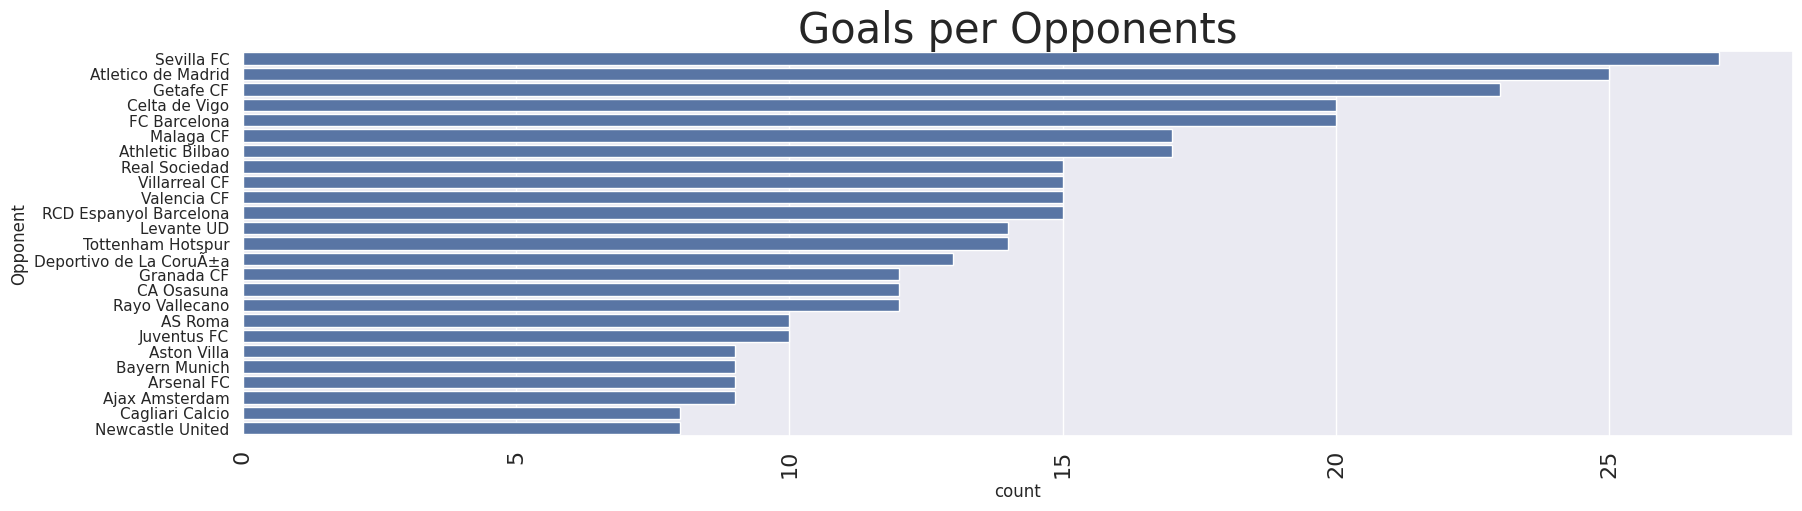

In [29]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=16,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins1)
p.axes.set_title("Goals per Opponents",fontsize=30)

Text(0.5, 1.0, 'Goals per Opponents')

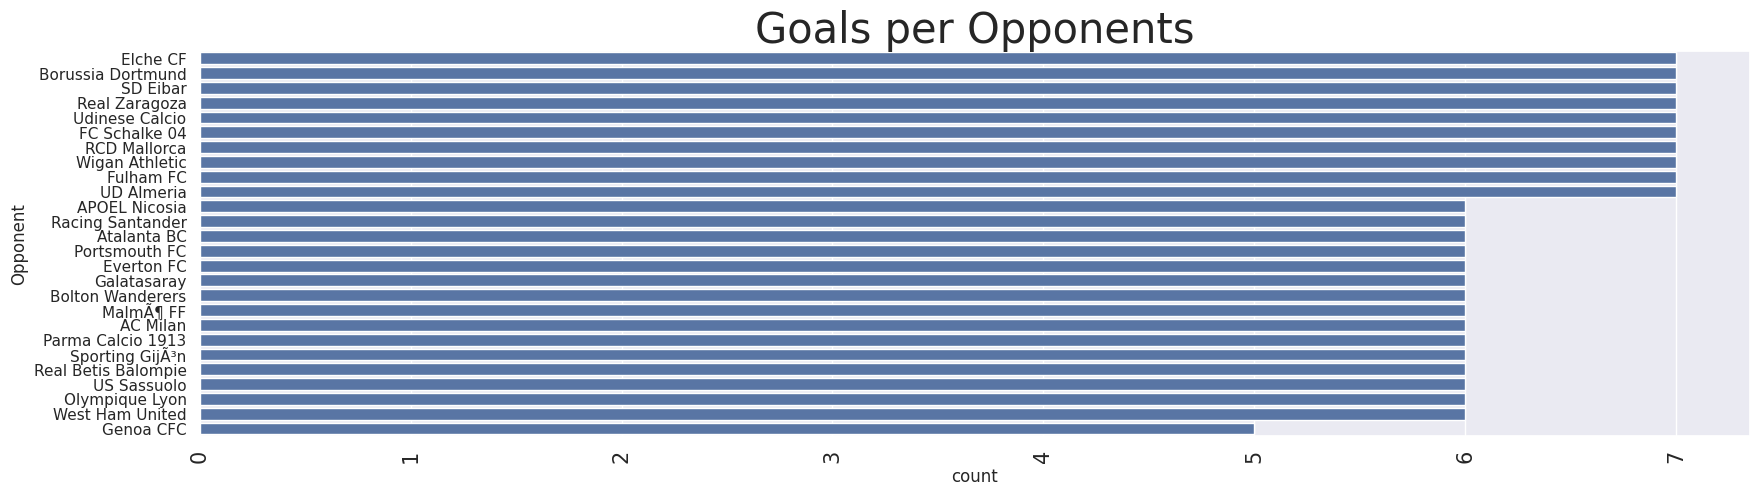

In [30]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins2)
p.axes.set_title("Goals per Opponents",fontsize=30)

Text(0.5, 1.0, 'Goals per Opponents')

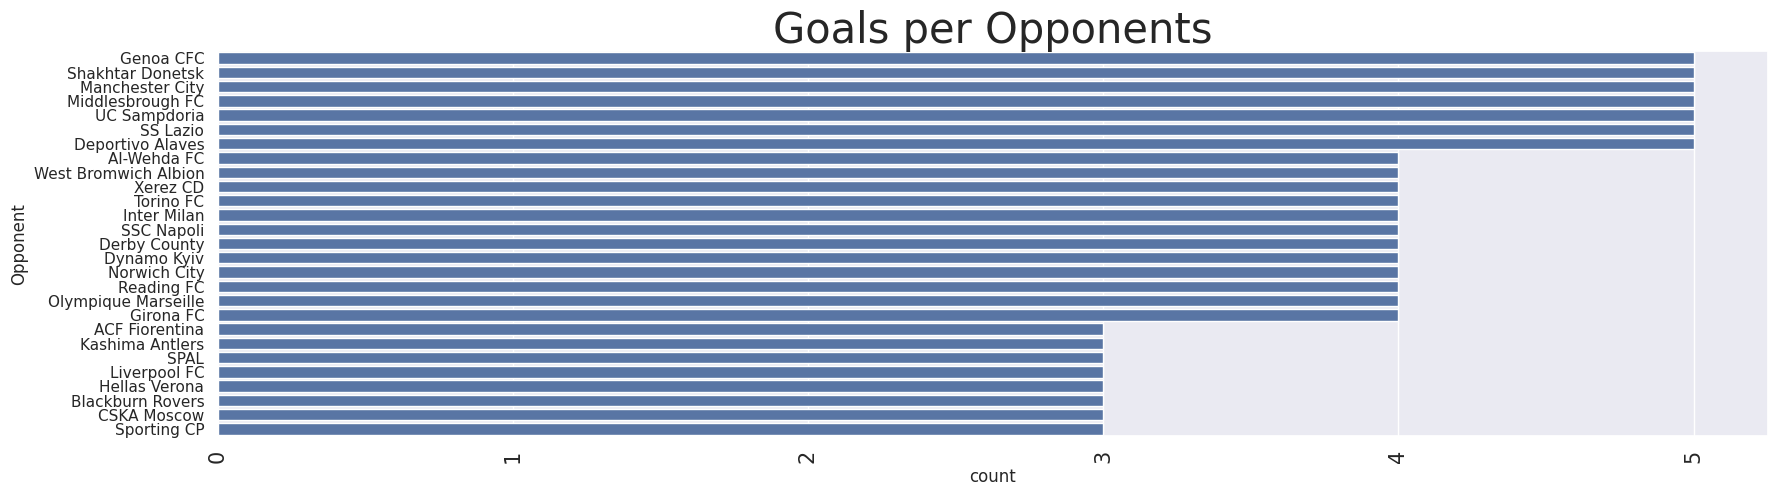

In [31]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins3)
p.axes.set_title("Goals per Opponents",fontsize=30)

Text(0.5, 1.0, 'Goals per Opponents')

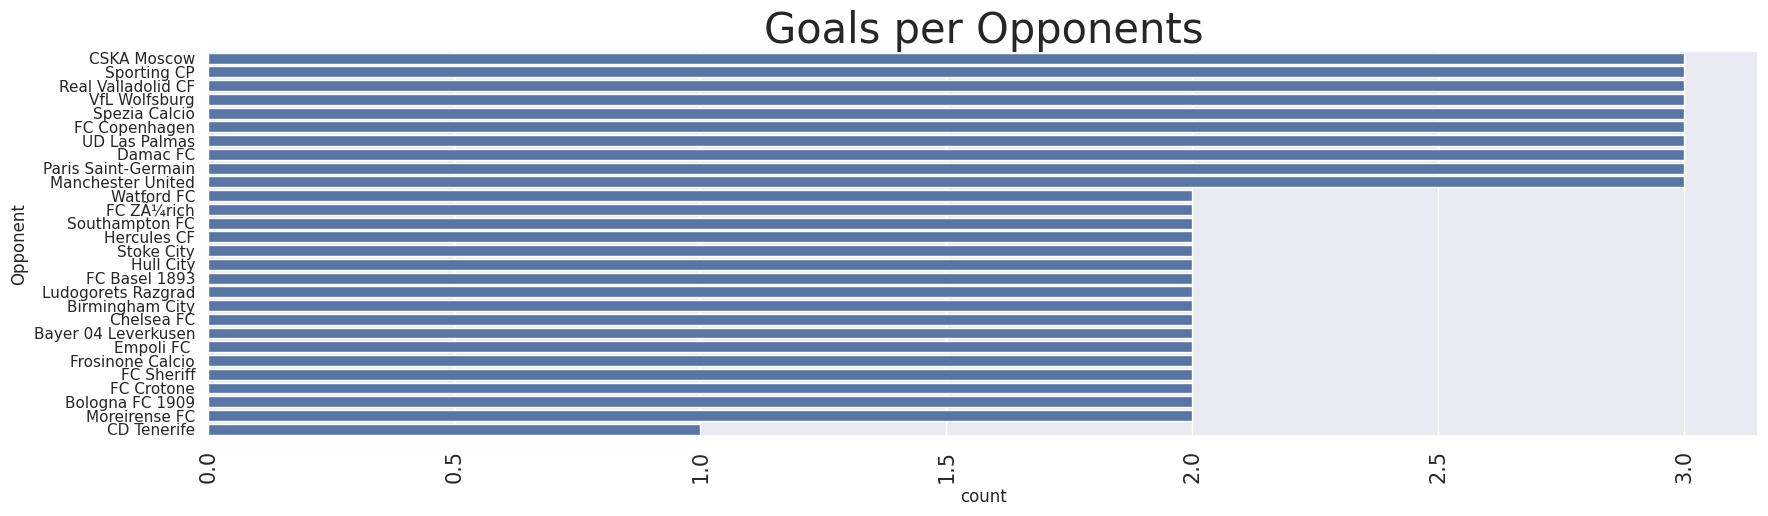

In [32]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins4)
p.axes.set_title("Goals per Opponents",fontsize=30)

# Favourite Opponents

<BarContainer object of 7 artists>

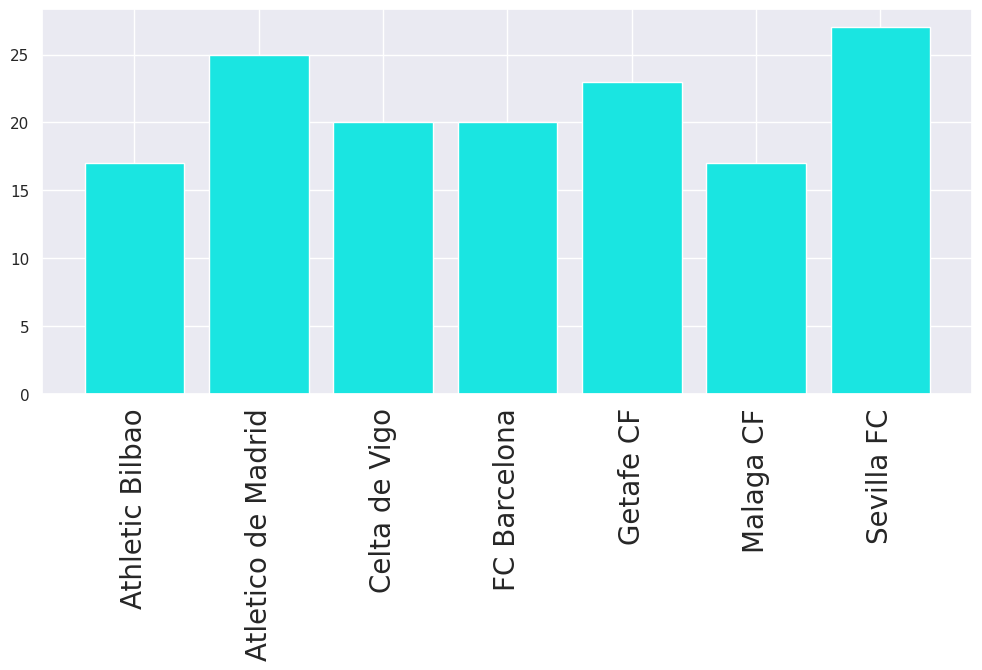

In [33]:
sns.set(rc={'figure.figsize':(12,5)})
opponents_df=df.groupby('Opponent').size().reset_index(name='count')
fav_opponents_df=opponents_df[opponents_df["count"]>15]
plt.xticks(fontsize=20,rotation='vertical')
plt.bar(x=fav_opponents_df['Opponent'],height=fav_opponents_df['count'],color="#1ae5e1")

# Assist

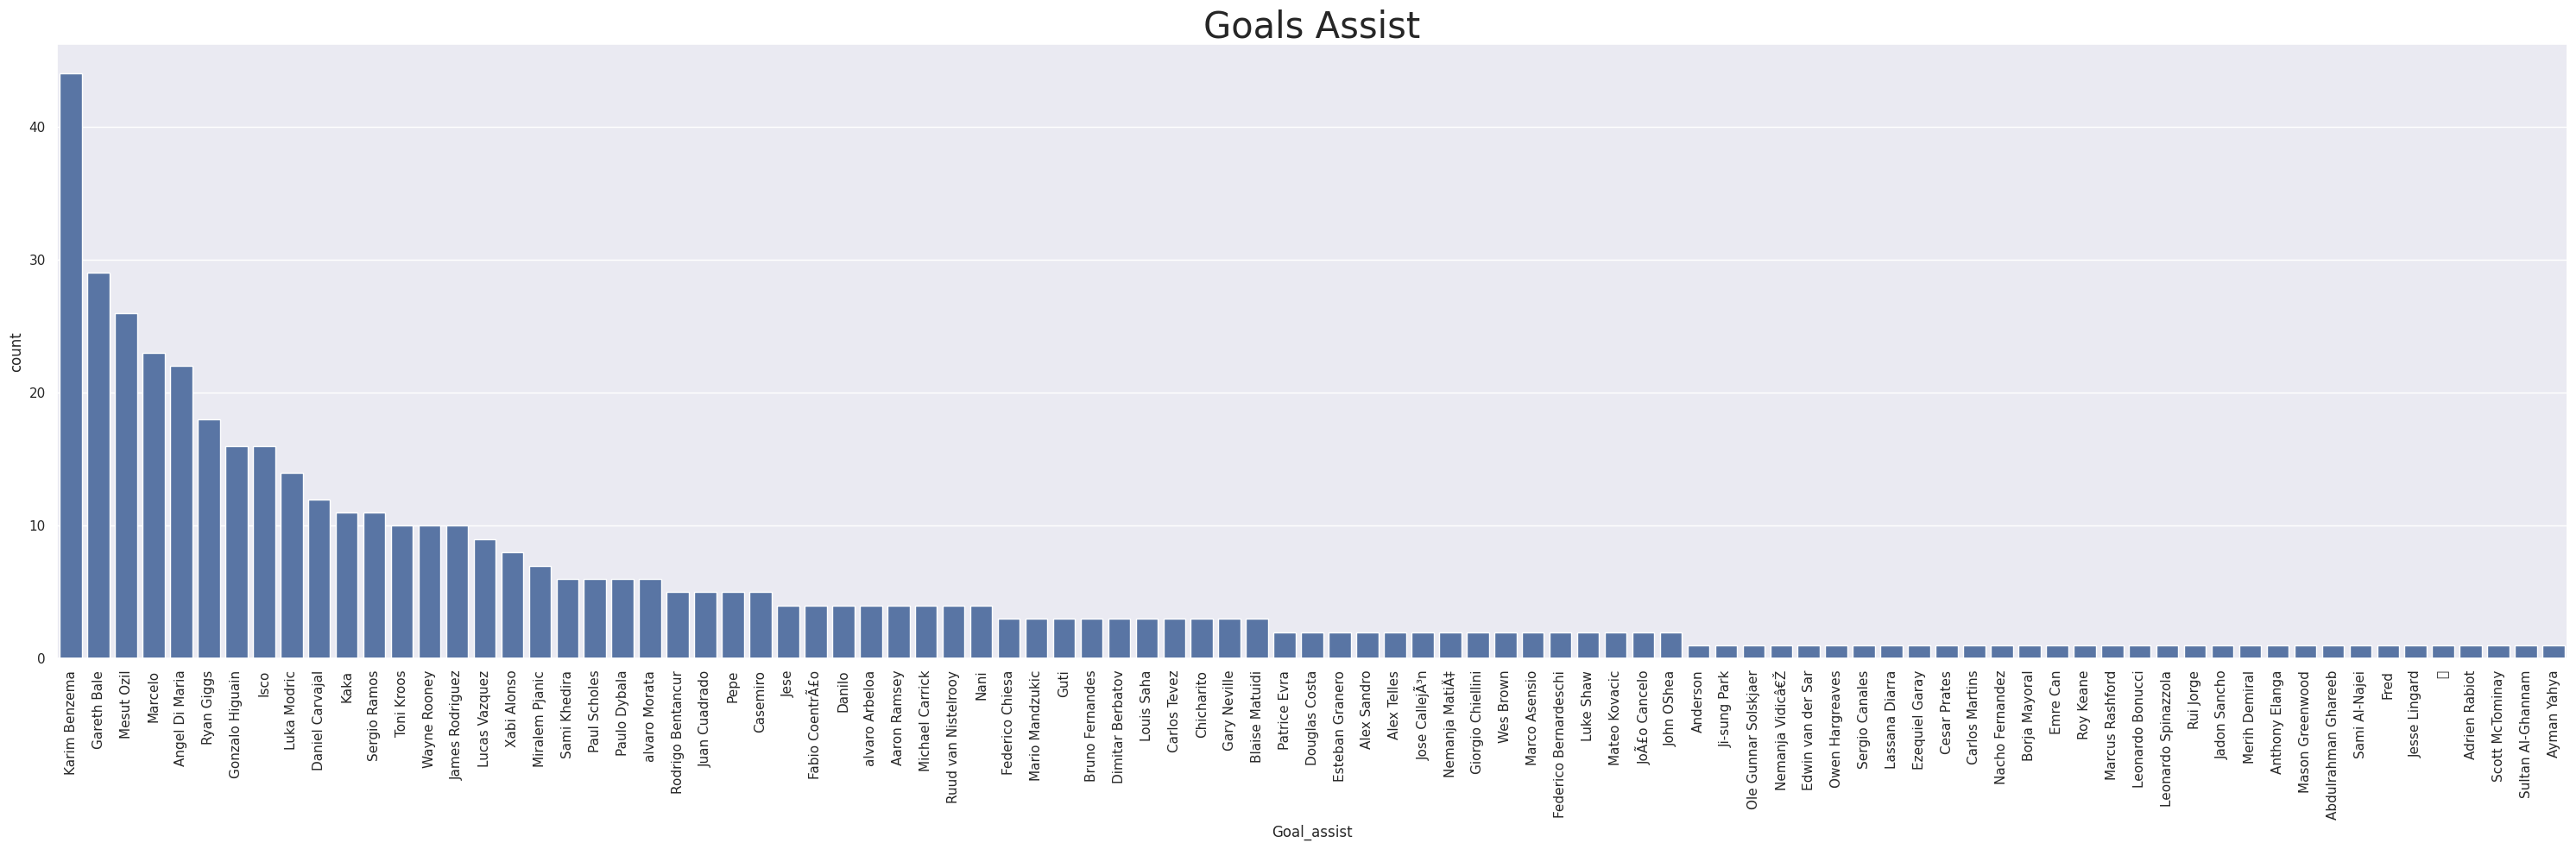

In [45]:
sns.set(rc={'figure.figsize':(30,10)})
plt.xticks(rotation=90)
p = sns.countplot(data=df, x='Goal_assist',
                  order=df['Goal_assist'].value_counts().sort_values(ascending=False).index)
p.set_title("Goals Assist", fontsize=30)
plt.tight_layout()
plt.show()


# Home - Away goals

<Axes: title={'center': 'Goals per venue'}, ylabel='count'>

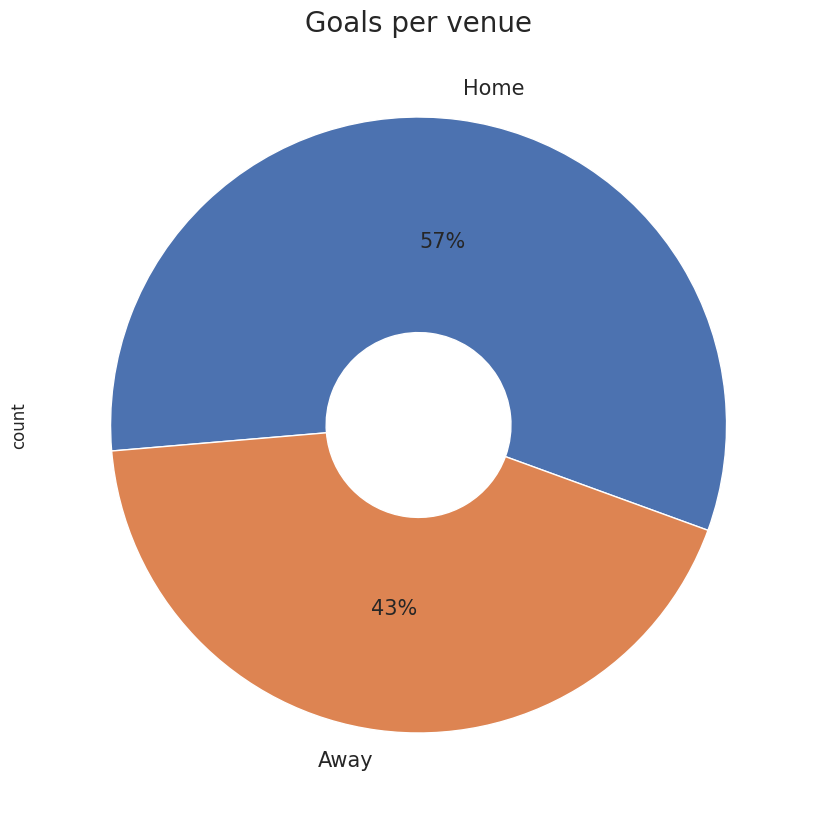

In [35]:
plt.figure(figsize=(30,10))
plt.title('Goals per venue', fontsize=20)
df.Venue.value_counts().plot(kind='pie', labels=['Home', 'Away'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})